In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv("./data/fake_reg.csv")

In [101]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [102]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


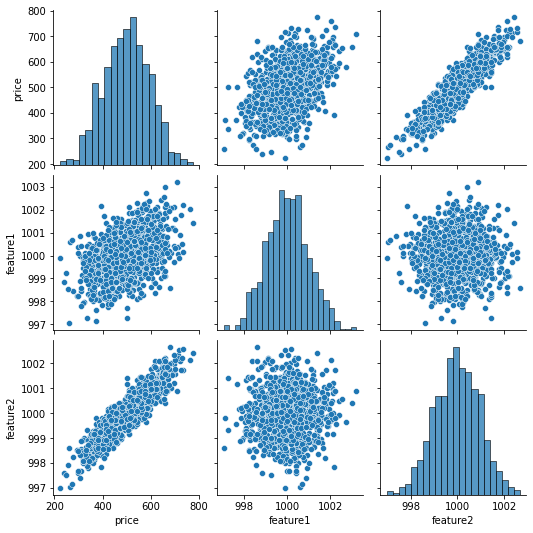

In [4]:
# Print the pair plot
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# TensorFlow works with Numpy Arrays
# So get features and convert to np array
X = df.iloc[:,1:].values
y = df.price.values

In [7]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [8]:
X[:5]

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       [ 999.9522513 , 1000.44094031],
       [1000.44601093, 1000.33853129]])

In [9]:
y[:5]

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
# Normalization usually required in features
# This is because, havinng large features values could cause errors in weights & biases of NN/W.
# No need to scale the label
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled[:5]

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       [0.52955895, 0.93551377],
       [0.52907398, 0.39249753]])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

Dense Layer - Densely connected NN layer, where every neuron is connected to every other neuron in the layer.
Dense Paramters
* unit - no of neurons
* activation - activation function

In [19]:
# Method 1 
# Create a model along with Layer info
model = Sequential([
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1)  #output layer
])

In [41]:
# Method 2
# Create an empty model
model = Sequential()

# Add layers
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

Last step in setting up a nn/w is Compile the n/w with optimizer and loss func
* For a multiclass classification, use
    * Optimizer = 'rmsprop'
    * loss = 'categorical_crossentropy'
    * metrics = ['accuracy']
    
* For binary classification, use
    * Optimizer = 'rmsprop'
    * loss = 'binary_crossentropy'
    * metrics = ['accuracy']
    
* For regression problem, use
    * Optimizer = 'rmsprop'
    * loss = 'mse'

In [42]:
# Train the model
# verbose = 0 - no outputs
model.fit(x=X_train_scaled, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256614.6719
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256536.7344
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256414.4688
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256272.2969
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256105.4375
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255910.7812
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255683.4531
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255423.3125
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255123.5156
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254784.9219
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254401.7656
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 1147.6649
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 1114.8572
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 1083.2467
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 1050.3379
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 1017.3754
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 985.3239
Epoch 103/250
22/22 [==============================] - 0s 899us/step - loss: 956.5341
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 927.0742
Epoch 105/250
22/22 [==============================] - 0s 911us/step - loss: 894.0193
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 867.5393
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 836.3752
Epoch 108/250
22/22 [==============================] - 0s 1ms/step - l

22/22 [==============================] - 0s 838us/step - loss: 24.9005
Epoch 195/250
22/22 [==============================] - 0s 941us/step - loss: 24.5228
Epoch 196/250
22/22 [==============================] - 0s 997us/step - loss: 24.1547
Epoch 197/250
22/22 [==============================] - 0s 943us/step - loss: 24.3666
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 24.6860
Epoch 199/250
22/22 [==============================] - 0s 919us/step - loss: 24.0465
Epoch 200/250
22/22 [==============================] - 0s 909us/step - loss: 24.4942
Epoch 201/250
22/22 [==============================] - 0s 958us/step - loss: 24.4226
Epoch 202/250
22/22 [==============================] - 0s 921us/step - loss: 24.3675
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 24.4627
Epoch 204/250
22/22 [==============================] - 0s 930us/step - loss: 24.5688
Epoch 205/250
22/22 [==============================] - 0s 998us/step - loss: 24.395

## Training History

In [43]:
model.history.history

{'loss': [256614.671875,
  256536.734375,
  256414.46875,
  256272.296875,
  256105.4375,
  255910.78125,
  255683.453125,
  255423.3125,
  255123.515625,
  254784.921875,
  254401.765625,
  253971.265625,
  253486.21875,
  252938.1875,
  252324.984375,
  251642.75,
  250884.78125,
  250046.609375,
  249123.265625,
  248112.53125,
  247001.328125,
  245786.28125,
  244459.59375,
  243039.046875,
  241492.359375,
  239818.125,
  238014.21875,
  236072.015625,
  234005.4375,
  231762.171875,
  229389.6875,
  226856.296875,
  224074.609375,
  221126.46875,
  217962.375,
  214603.75,
  211029.765625,
  207273.8125,
  203284.0625,
  199047.0625,
  194617.171875,
  189973.765625,
  185091.21875,
  179989.046875,
  174686.75,
  169106.984375,
  163327.171875,
  157335.40625,
  151183.84375,
  144820.703125,
  138239.125,
  131484.40625,
  124600.34375,
  117556.296875,
  110413.375,
  103210.8125,
  95891.609375,
  88522.1015625,
  81150.921875,
  73779.2578125,
  66538.4296875,
  59392.46093

In [44]:
# Plot the loss
loss = pd.DataFrame(model.history.history)

In [45]:
loss.head()

,loss
0,256614.671875
1,256536.734375
2,256414.468750
3,256272.296875
4,256105.437500


<AxesSubplot:>

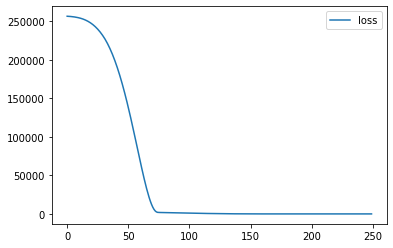

In [46]:
loss.plot()

In [47]:
model.weights

[<tf.Variable 'dense_7/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[1.8486862, 0.9508012, 1.7146415, 1.5297129],
        [1.9366553, 3.2768397, 3.2730763, 3.5239537]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(4,) dtype=float32, numpy=array([0.7543758 , 0.2492913 , 0.74429554, 0.7423399 ], dtype=float32)>,
 <tf.Variable 'dense_8/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.6278865 ,  2.053469  , -0.7466299 ,  1.5053056 ],
        [-0.03383303,  2.1683397 , -0.7361147 ,  1.7595602 ],
        [-0.05269527,  2.4356706 ,  0.01928967,  2.179152  ],
        [ 0.05705908,  2.7446766 , -0.44290435,  2.368124  ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([-0.01163805,  0.7257622 ,  0.        ,  0.73742044], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.58118606, -0.09884762, -0.12502488, -0.39164656],
        [ 0.5354415 ,  1.4769852 ,  2.0790029 , -0.13709277

## Model Evaluation

In [48]:
model.evaluate(X_test_scaled, y_test, verbose=0)

26.616992950439453

In [49]:
model.evaluate(X_train_scaled, y_train, verbose=0)

26.726112365722656

In [50]:
y_pred = model.predict(X_test_scaled)

In [78]:
y_pred[0][0]

404.06268

In [94]:
pred_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.reshape(300,)
})

In [95]:
pred_df["diff"] = pred_df.y_test - pred_df.y_pred

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [97]:
print(f"MAE \t: {mean_absolute_error(pred_df.y_test, pred_df.y_pred)}")
print(f"MSE \t: {mean_squared_error(pred_df.y_test, pred_df.y_pred)}")
print(f"RMSE \t: {mean_squared_error(pred_df.y_test, pred_df.y_pred)**0.5}")
print(f"RMSE \t: {np.sqrt(mean_squared_error(pred_df.y_test, pred_df.y_pred))}")

MAE 	: 4.144658492768287
MSE 	: 26.616999718895574
RMSE 	: 5.1591665721214675
RMSE 	: 5.1591665721214675


In [98]:
pred_df.describe()

,y_test,y_pred,diff
count,300.000000,300.000000,300.000000
mean,500.375339,499.062653,1.312698
std,93.922502,93.823906,4.997708
min,246.739720,249.857590,-15.328786
25%,435.220788,435.029091,-1.965762
50%,502.979961,502.230042,1.162659
75%,567.451939,566.021378,5.133751
max,722.263944,719.149048,14.624481


From the above mean of y_test (500) and RMSE 5.15, which is just 1% of mean of y_test. This indicates that the model is doing a good job in predicting the prices.

<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

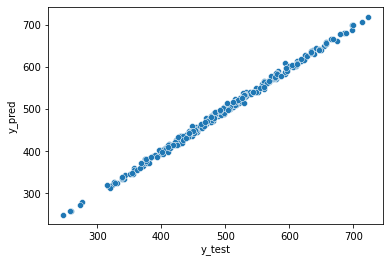

In [83]:
sns.scatterplot(x="y_test", y="y_pred", data=pred_df)

Above plot indicates that the true value and model predictions are correlating each other and perfect match.

## Predict new Value

In [108]:
# Lets create new validation samples using original data
import statistics

df_new = pd.DataFrame({
    "feature1" : np.random.normal(loc=df.feature1.mean(), scale=statistics.pstdev(df.feature1), size=5),
    "feature2" : np.random.normal(loc=df.feature2.mean(), scale=statistics.pstdev(df.feature2), size=5)
})


In [109]:
df_new

,feature1,feature2
0,1000.222282,1001.043422
1,998.899075,1000.872172
2,1000.217487,1000.073113
3,999.086381,1001.464505
4,998.426024,1002.077780


In [112]:
X_new_scaled = scaler.transform(df_new.values)

In [113]:
X_new_scaled

array([[0.50764592, 0.72712363],
       [0.28944013, 0.6963611 ],
       [0.50685515, 0.55282163],
       [0.32032815, 0.80276504],
       [0.21143068, 0.91293103]])

In [114]:
y_new_pred = model.predict(X_new_scaled)
y_new_pred

array([[599.40393],
       [531.43604],
       [513.4436 ],
       [591.2727 ],
       [619.11664]], dtype=float32)

## Save Model

In [115]:
from tensorflow.keras.models import load_model

In [116]:
model.save('sample_reg.h5')

In [117]:
new_model = load_model('sample_reg.h5')

In [118]:
new_model.predict(X_new_scaled)

array([[599.40393],
       [531.43604],
       [513.4436 ],
       [591.2727 ],
       [619.11664]], dtype=float32)